In [1]:
import os
import excursion
import excursion.optimize as optimize
import excursion.diagnosis as diagnosis
from excursion.testcases.fast import masked_single as scandetails
import numpy as np
import datetime

import excursion.plotting.twodim as plots
import excursion.utils as utils

np.warnings.filterwarnings('ignore')
%pylab inline

/Users/lukas/Code/excursion/venv/lib/python3.6/site-packages/numpy/lib/index_tricks.py:199: ComplexWarning: Casting complex values to real discards the imaginary part
  nn[k] = (nn[k]*step+start)


Populating the interactive namespace from numpy and matplotlib


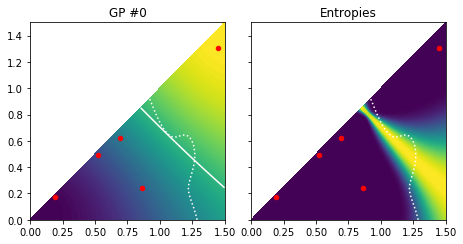

0.8835078327771597


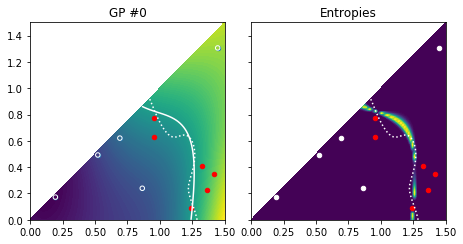

0.9601937337782722


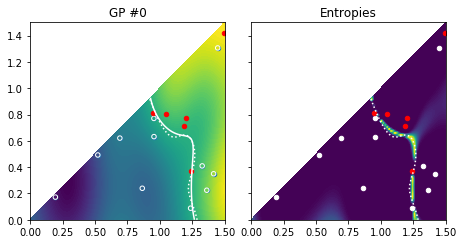

0.988302048572488


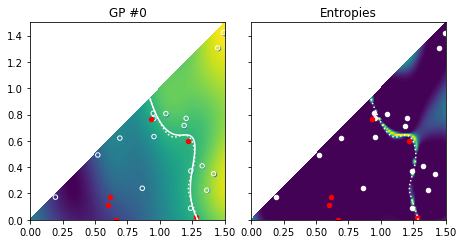

0.993014923989618


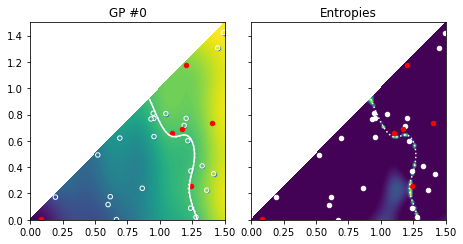

0.9976126251390434


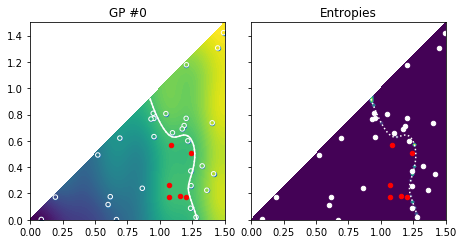

1.0


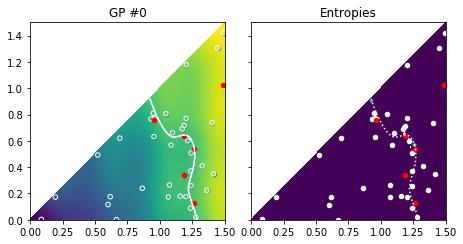

1.0


KeyboardInterrupt: 

In [3]:
def plot_and_save(workdir, index, *args,**kwargs):
    fig, axarr = plt.subplots(1, 2, sharey=True)
    fig.set_size_inches(6.5, 3.5)
    plt.title('Iteration {}'.format(index))
    plots.plot(axarr,gps,X,y_list,scandetails,**kwargs)
    plt.tight_layout()
    plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))), bbox_inches = 'tight')
    plt.show()

N_UPDATES = 20
N_BATCH = 6
workdir = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-2dmulti')
os.mkdir(workdir)
X,y_list,gps = optimize.init(scandetails)

testX = scandetails.plotX[~scandetails.invalid_region(scandetails.plotX)]
testy_list = [func(testX) for func in scandetails.functions]
testdata = testX, testy_list


for index in range(N_UPDATES):
    plot_and_save(workdir, index, gps,X,y_list,scandetails, batchsize = (N_BATCH if index > 0 else len(X)), evaluate_truth = True)

    t = diagnosis.diagnose(testdata,gps,scandetails)
    print(t)

    
    newX = optimize.suggest(gps, X, scandetails, batchsize=N_BATCH)
    X,y_list,gps  = optimize.evaluate_and_refine(X,y_list,newX,scandetails)

plot_and_save(workdir, index+1, gps,X,y_list,scandetails, batchsize = (N_BATCH if index > 0 else len(X)), evaluate_truth = True)